In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [48]:
csv_file = "C:/Hany/Data Analyst Course/Homework/Matplotlib Homework/Mouse_metadata.csv"
Cancer_treatment = pd.read_csv(csv_file)
Cancer_treatment.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
mouse_id = Cancer_treatment.drop_duplicates("Mouse ID")
mouse_id.size

1245

Please make sure that this is the required data (tumore volume?????)

In [4]:
tumer_volume = pd.DataFrame(mouse_id, columns = ['Drug Regimen', 'Weight (g)'])
#df = pd.DataFrame(data, columns = ['Name', 'Age']) 
tumer_volume.head()

,Drug Regimen,Weight (g)
0,Ramicane,16
1,Capomulin,17
2,Capomulin,15
3,Capomulin,17
4,Ramicane,16


In [5]:
tumer_volume.describe()

,Weight (g)
count,249.000000
mean,26.116466
std,3.697003
min,15.000000
25%,25.000000
50%,27.000000
75%,29.000000
max,30.000000


* Generate a bar plot using both Pandas's `DataFrame.plot()` and Matplotlib's `pyplot` that shows  
the number of mice per time point for each treatment regimen throughout the course of the study.

In [7]:
count_per_month = Cancer_treatment.groupby(['Age_months']).count()
count_per_month.head()

,Mouse ID,Drug Regimen,Sex,Weight (g)
Age_months,,,,
1,8,8,8,8
2,12,12,12,12
3,13,13,13,13
4,11,11,11,11
5,12,12,12,12


In [8]:
mouse_count_per_month = count_per_month.drop(['Drug Regimen', 'Sex', 'Weight (g)'], axis=1)
mouse_moth_count = mouse_count_per_month.copy()
mouse_count_per_month.head()

,Mouse ID
Age_months,
1,8
2,12
3,13
4,11
5,12


In [9]:
yyy = Cancer_treatment.groupby(["Age_months"], as_index=False)["Sex"].count()

In [10]:
y= mouse_count_per_month["Mouse ID"].tolist()
print(y)

[8, 12, 13, 11, 12, 8, 11, 16, 8, 6, 10, 8, 8, 7, 7, 8, 10, 13, 13, 11, 14, 11, 14, 10]


In [11]:
mouse_count_per_month.columns.tolist()

['Mouse ID']

In [12]:
x = yyy["Age_months"].tolist()
print(x)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


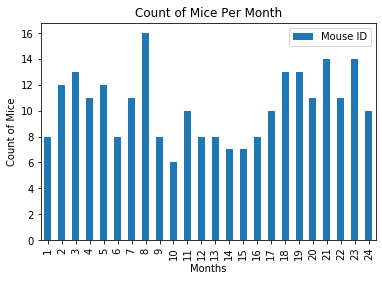

In [158]:
mouse_moth_count.plot.bar()
plt.xlabel("Months")
plt.ylabel("Count of Mice")
plt.title("Count of Mice Per Month");
plt.show()

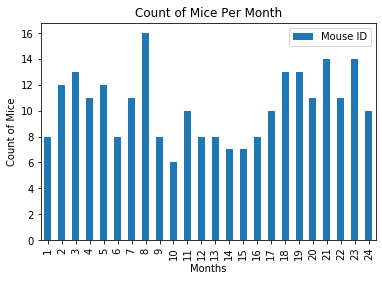

In [157]:
mouse_moth_count.plot(kind='bar')
plt.xlabel("Months")
plt.ylabel("Count of Mice")
plt.title("Count of Mice Per Month");

* Generate a pie plot using both Pandas's `DataFrame.plot()` and Matplotlib's `pyplot` 
that shows the distribution of female or male mice in the study.

In [15]:
gender_data = Cancer_treatment.groupby(["Sex"], as_index=False)["Mouse ID"].count()
gender_data.head()

,Sex,Mouse ID
0,Female,124
1,Male,125


In [16]:
gender = gender_data["Sex"].tolist()
print(gender)

['Female', 'Male']


In [20]:
count_mice = gender_data["Mouse ID"].tolist()
print(count_mice)

[124, 125]


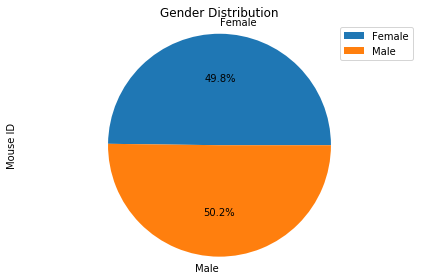

In [22]:
labels = 'Female', 'Male'
sex_plot = gender_data.plot.pie(y='Mouse ID', labels=labels,autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.axis('equal')
plt.tight_layout()
plt.show()

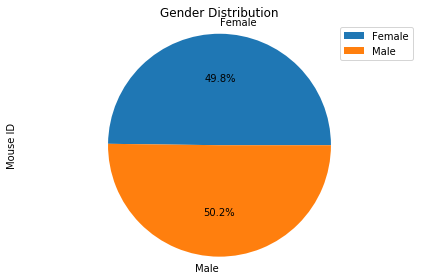

In [23]:
labels = 'Female', 'Male'
Cancer_treatment.groupby(["Sex"], as_index=False)["Mouse ID"].count().plot(kind='pie', y='Mouse ID', labels=labels,autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.axis('equal')
plt.tight_layout()
plt.show()

* Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: 
    Capomulin, Ramicane, Infubinol, and Ceftamin. 
    Calculate the quartiles and IQR and quantitatively 
    determine if there are any potential outliers across all four treatment regimens.

In [26]:
tumor_volume = mouse_id[(mouse_id["Drug Regimen"] == ('Capomulin')) | (mouse_id["Drug Regimen"] == ('Ramicane')) | (mouse_id["Drug Regimen"] == ('Infubinol')) | (mouse_id["Drug Regimen"] == ('Ceftamin'))]
tumor_volume.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [29]:
tumor_volume.describe()

,Age_months,Weight (g)
count,100.000000,100.000000
mean,13.520000,23.710000
std,7.608448,4.472802
min,1.000000,15.000000
25%,7.000000,20.000000
50%,15.000000,25.000000
75%,20.000000,27.250000
max,24.000000,30.000000


In [28]:
from scipy.stats import iqr
iqr(tumor_volume['Weight (g)'])

7.25

In [41]:
Mouse_quantile = tumor_volume['Weight (g)'].quantile(0.75)
Mouse_quantile

27.25

In [44]:
quartiles = tumor_volume['Weight (g)'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
quartiles

0.0    15.0
0.1    17.0
0.2    19.0
0.3    21.0
0.4    23.0
0.5    25.0
0.6    25.0
0.7    26.3
0.8    28.0
0.9    29.1
1.0    30.0
Name: Weight (g), dtype: float64

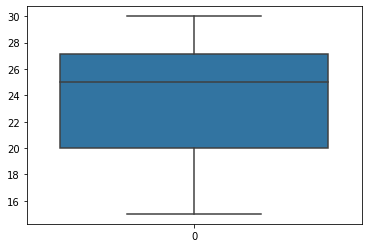

In [57]:
import seaborn as sns
sns.boxplot(data=quartiles)

In [35]:
tumor_volume_count = tumor_volume.groupby(["Drug Regimen"], as_index=False)["Weight (g)"].mean()
tumor_volume_count.describe()

,Weight (g)
count,4.000000
mean,23.710000
std,4.215068
min,20.000000
25%,20.090000
50%,23.720000
75%,27.340000
max,27.400000


Generate a line plot of time point versus tumor volume for a single mouse treated with Capomulin

Text(0.5, 0.98, 'Age and Weight corelation for Capomulin Mouse')

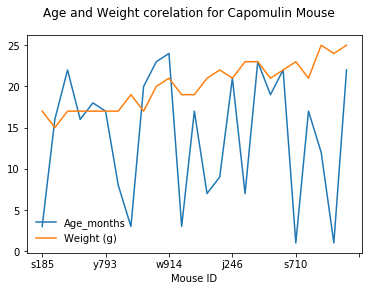

In [93]:
single_mouse = mouse_id[(mouse_id["Drug Regimen"] == ('Capomulin'))]
#single_mouse.head() 
lines = single_mouse.plot.line('Mouse ID')
lines.legend(loc='lower left', frameon=False)
plt.suptitle("Age and Weight corelation for Capomulin Mouse")

* Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin treatment regimen.




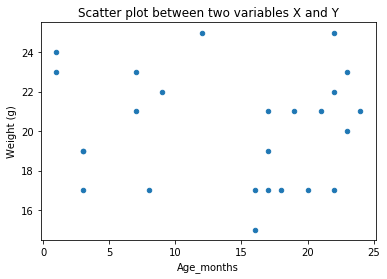

In [98]:
single_mouse.plot.scatter(x='Age_months', y='Weight (g)', title= "Scatter plot between two variables X and Y");
plt.show(block=True);

* Look across all previously generated figures and tables and write at least three observations 
or inferences that can be made from the data. Include these observations at the top of notebook.

In [120]:
Drug_Regimen = tumer_volume.groupby(["Drug Regimen"], as_index=False).sum()
new = Drug_Regimen.sort_values(by='Weight (g)', ascending=False)
new.head()

,Drug Regimen,Weight (g)
3,Ketapril,702
5,Placebo,701
9,Zoniferol,698
1,Ceftamin,685
2,Infubinol,683


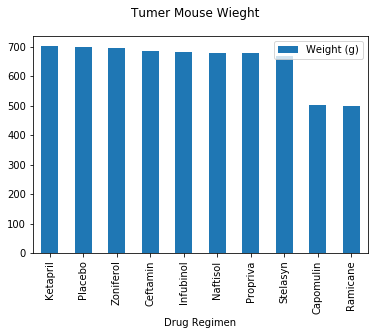

In [121]:
new = Drug_Regimen.sort_values(by='Weight (g)', ascending=False)
new.plot(x ='Drug Regimen', y='Weight (g)', kind = 'bar')
plt.suptitle("Tumer Mouse Wieght")
plt.show()

Findings:

Based on the above analysis:

    1- Ketapril considered as the first when it comes to tumer's wight
    2- The same drug regimen (Ketapril) was noticed in the oldest age of a mouse in the experiement
    3- Couldn't find any clear corelation between mice age and tumer weight